In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\VARUN\Desktop\PROJECTS\Untitled Folder\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

print(non_numeric_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for name in non_numeric_cols:
    df[f'{name}'] = label_encoder.fit_transform(df[f'{name}'])

In [8]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [9]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
Y = df[['HeartDisease']]

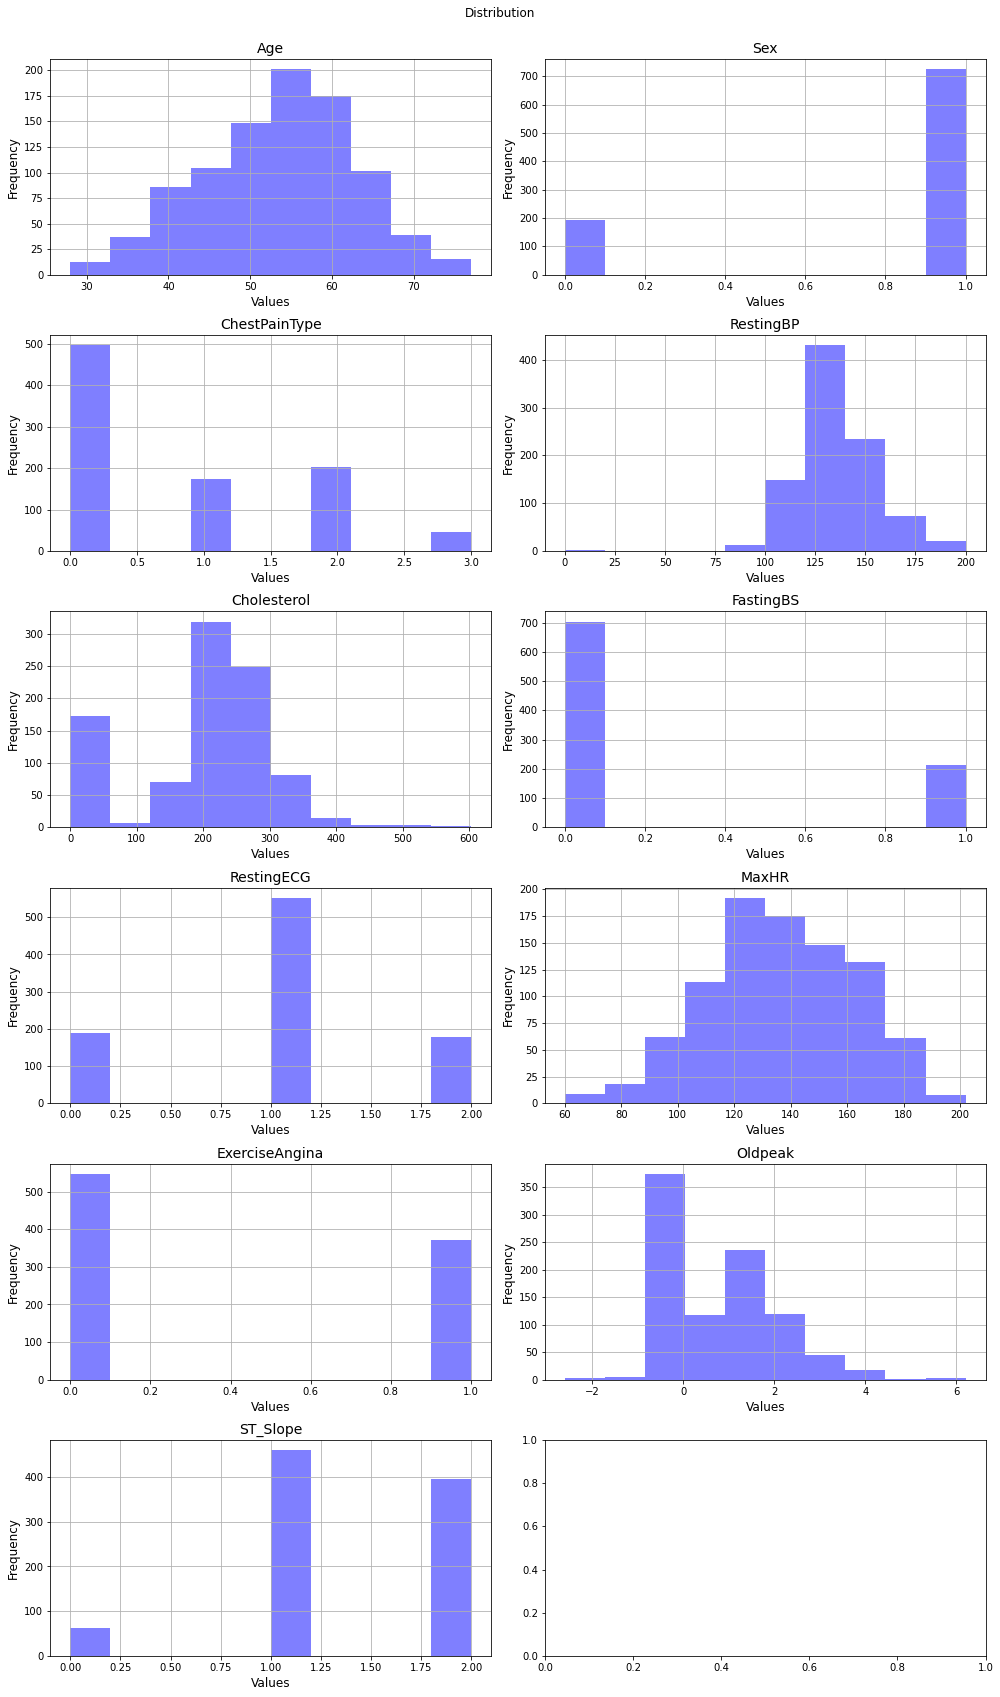

In [10]:
list_columns = list(X.columns)

fig, axs = plt.subplots(6, 2, figsize=(14, 24))
fig.suptitle('Distribution')

for i, column in enumerate(list_columns):
    ax = axs.flat[i]
    ax.hist(df[column], color = 'blue', alpha = 0.5)
    ax.set_title(column, fontsize = 14)
    ax.set_xlabel('Values', fontsize = 12)
    ax.set_ylabel('Frequency', fontsize = 12)
    ax.grid(True)
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)

In [11]:
skewness = X.skew()
skewed_cols = skewness[abs(skewness) > 1].index
for col in skewed_cols:
    print(col)

Sex
FastingBS
Oldpeak


In [12]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
Y = df[['HeartDisease']]

In [13]:
X['Oldpeak']

0      0.0
1      1.0
2      0.0
3      1.5
4      0.0
      ... 
913    1.2
914    3.4
915    1.2
916    0.0
917    0.0
Name: Oldpeak, Length: 918, dtype: float64

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)
X_imputed = imputer.fit_transform(X)
print(X_imputed)

[[40.   1.   1.  ...  0.   0.   2. ]
 [49.   0.   2.  ...  0.   1.   1. ]
 [37.   1.   1.  ...  0.   0.   2. ]
 ...
 [57.   1.   0.  ...  1.   1.2  1. ]
 [57.   0.   1.  ...  0.   0.   1. ]
 [38.   1.   2.  ...  0.   0.   2. ]]


In [15]:
X= X_imputed

In [16]:
X_df = pd.DataFrame(X , columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
Y_df = Y.values

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size = 0.20, stratify = Y, random_state = 42)

In [18]:
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt'],
    'max_depth': [10, 11, 12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)

print("Best parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}


In [19]:
Y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

In [20]:
print("Accuracy for Random Forest Classifier: %.2f%%" % (accuracy * 100.0))

Accuracy for Random Forest Classifier: 89.13%


In [21]:
import sys
!{sys.executable} -m pip install xgboost

In [41]:
import xgboost as xgb

params_xgboost = {
    'objective': 'multi:softmax',
    'num_class': 2,
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 50,
}

xgboost_clf = xgb.XGBClassifier(**params_xgboost)
xgboost_clf.fit(X_train, Y_train)

Y_pred_xgboost = xgboost_clf.predict(X_test)

accuracy_xgboost = accuracy_score(Y_test, Y_pred_xgboost)
print("Accuracy for XG Boost: %.2f%%" % (accuracy_xgboost * 100.0))

Accuracy for XG Boost: 90.76%


In [23]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
Y = df[['HeartDisease']]

In [24]:
best_clf = grid_search.best_estimator_
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature '%s' (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 'ST_Slope' (0.257002)
2. feature 'ChestPainType' (0.127821)
3. feature 'MaxHR' (0.109190)
4. feature 'Oldpeak' (0.106704)
5. feature 'Cholesterol' (0.103380)
6. feature 'ExerciseAngina' (0.081186)
7. feature 'Age' (0.075079)
8. feature 'RestingBP' (0.063616)
9. feature 'Sex' (0.030324)
10. feature 'RestingECG' (0.024370)
11. feature 'FastingBS' (0.021329)


In [25]:
X_improved = df[['ST_Slope','ChestPainType','MaxHR','Oldpeak','Cholesterol','ExerciseAngina']]
Y_improved = Y

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)
X_imputed = imputer.fit_transform(X)
print(X_imputed)
X = X_imputed

[[40.   1.   1.  ...  0.   0.   2. ]
 [49.   0.   2.  ...  0.   1.   1. ]
 [37.   1.   1.  ...  0.   0.   2. ]
 ...
 [57.   1.   0.  ...  1.   1.2  1. ]
 [57.   0.   1.  ...  0.   0.   1. ]
 [38.   1.   2.  ...  0.   0.   2. ]]


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size = 0.20, stratify = Y, random_state = 42)

In [28]:
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt'],
    'max_depth': [6,7,8,9,10],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1, 2],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)

print("Best parameters: ", grid_search.best_params_)

import warnings
warnings.filterwarnings('ignore')

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters:  {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}


In [29]:
Y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy for Random Forest Classifier: %.2f%%" % (accuracy * 100.0))

Accuracy for Random Forest Classifier: 89.13%
